<center>
<p><img src="https://mcd.unison.mx/wp-content/themes/awaken/img/logo_mcd.png" width="150">
</p>

<h1> Matemáticas para ciencia de datos</h1>


<h3>Ejercicio obligatorio</h3>

<h4> Alumna: Diana Laura Ballesteros Valenzuela</h4>

<img src="https://identidadbuho.unison.mx/wp-content/uploads/2019/06/letragrama-cmyk-72.jpg" width="150">

</center>

En el año 2020 el CONAPO (Consejo Nacional de Población) publicó los índices de marginación urbana por AGEBS urbanas –Áreas Geoestadísticas Básicas urbanas– basado en el Censo de Población y Vivienda 2020. Estos índices son de suma importancia para diferentes estudios que tratan de medir el papel que juega la pobreza en diferentes sectores de la vida pública:

https://www.gob.mx/conapo/documentos/indices-de-marginacion-2020-284372.

En este censo se recopila información y se establecen algunas fórmulas muy sencillas (no así la recopilación de la información que se hace cada 10 años) para estimar las siguientes 11 variables de marginación:

- P6A14NAE: Porcentaje de población de 6 a 14 que no asiste a la escuela

- SBASC: Porcentaje de población de 15 años o más sin educación básica

- PSDSS: Porcentaje de población sin derechohabiencia a los servicios de salud

- OVSDE: Porcentaje de ocupantes en viviendas sin drenaje ni excusado

- OVSEE: Porcentaje de ocupantes en viviendas sin energía eléctrica

- OVSAE: Porcentaje de ocupantes en viviendas sin agua entubada

- OVPT: Porcentaje de ocupantes en viviendas con piso de tierra

- OVHAC: Porcentaje de ocupantes en viviendas con hacinamiento

- OVSREF: Porcentaje de ocupantes en viviendas sin refrigerador

- OVSINT: Porcentaje de ocupantes en viviendas sin internet

- OSCEL: Porcentaje de ocupantes en viviendas sin celular

A partir de ahí se establece un índice llamado ÍNDICE DE MARGINACIÓN URBANA IM_2020 por medio de un procedimiento que se puede consultar en la siguiente nota metodológica:

https://www.gob.mx/cms/uploads/attachment/file/685307/Nota_t_cnica_IMU_2020.pdf

A partir de una estatificación del IM_2020 se calcula el GRADO DE MARGINACIÓN URBANA GM_2020 que puede ser:

- Muy Alto

- Alto

- Medio

- Bajo

- Muy bajo

**La polémica**

En el 2010, se calculó el INDICE DE MARGINACIÓN URBANA utilizando un procedimiento estándar de componentes principales, pero en el 2020 se decidió cambiar el cálculo por el que presenta la nota metodológica, llamado DP2, el cual fue severamente criticado por su falta de claridad y –según algunos expertos– «tenía muchos huecos». Aquí un ejemplo: https://www.facebook.com/events/402771884844304/. Por otro lado, los autores de la nota, afirman lo siguiente:

«El método DP2 ofrece múltiples ventajas [...] Estas bondades del método DP2 brindan mayores beneficios que el Análisis de Componentes Principales»

**Objetivo del proyecto**

Utilizar todas las herramientas de álgebra lineal vista en clase para tener una opinión científica, basada en argumentos matemáticos, sobre la polémica. En particular:

Conocer y analizar los datos con los que se hace el cálculo del IM_2020 a partir de los conceptos que vimos en clase.
Utilizar con las 11 variables de marginación el procedimiento de componentes principales y comparar con el índice propuesto con la CONAPO.
Entender matemáticamente las funciones de la librería de PCA de sklearn, lo que en particular te ayudará a entender teóricamente este procedimiento.
NO es objetivo del proyecto estudiar la metodología DP2, únicamente a partir del IM_2020 hacer un análisis. ¡Se sorprenderán de lo que seguro van a encontrar!

**Instrucciones**

A lo largo de la libreta se establecerán varias preguntas, algunas de ellas no tienen respuesta única. Algunas instrucciones sí son muy específicas para las cuales se debe de dar la respuesta puntual y precisa. Haz una libreta propia al final expórtala sin código al menos que lo consideres relevante.

Importamos librerias necesarias 

In [1]:
import xlrd
import numpy as np
import pandas as pd
import plotly.express as px
from IPython import display
import matplotlib.pyplot as plt
from sklearn import linear_model
from numpy.linalg import matrix_rank
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


## **1. Descarga y exploración inicial**

- Descarga el archivo adjunto MARGINACION_AGEBS_2020.xls y crea un dataframe de nombre df_INDICE

In [2]:
df_INDICE = pd.read_excel("MARGINACION_AGEBS_2020.xls")

In [3]:
df_INDICE

CVE_AGEB  ENT         NOM_ENT  MUN                NOM_MUN  LOC  \
0      0100100010017    1  Aguascalientes    1         Aguascalientes    1   
1      010010001006A    1  Aguascalientes    1         Aguascalientes    1   
2      0100100010106    1  Aguascalientes    1         Aguascalientes    1   
3      0100100010163    1  Aguascalientes    1         Aguascalientes    1   
4      0100100010182    1  Aguascalientes    1         Aguascalientes    1   
...              ...  ...             ...  ...                    ...  ...   
50785  3205700010408   32       Zacatecas   57               Trancoso    1   
50786  3205800010015   32       Zacatecas   58  Santa María de la Paz    1   
50787  320580001002A   32       Zacatecas   58  Santa María de la Paz    1   
50788  3205800010104   32       Zacatecas   58  Santa María de la Paz    1   
50789  3205800010123   32       Zacatecas   58  Santa María de la Paz    1   

                     NOM_LOC  AGEB  POB_TOT   P6A14NAE  ...     OVSEE  \
0             Aguascalientes  0017     2237  13.076923  ...  0.357942   
1             Aguascalientes  006A     1411   0.800000  ...  0.000000   
2             Aguascalientes  0106     2962   3.157895  ...  0.000000   
3             Aguascalientes  0163     2698   2.788845  ...  0.000000   
4             Aguascalientes  0182     2218   1.759531  ...  0.000000   
...                      ...   ...      ...        ...  ...       ...   
50785               Trancoso  0408      203  12.244898  ...  0.000000   
50786  Santa María de la Paz  0015      707   5.737705  ...  0.285714   
50787  Santa María de la Paz  002A      845   6.481481  ...  0.000000   
50788  Santa María de la Paz  0104      169   2.631579  ...  0.000000   
50789  Santa María de la Paz  0123      245   0.000000  ...  1.632653   

          OVSAE      OVPT      OVHAC     OVSREF     OVSINT      OSCEL  \
0      0.000000  0.089485  32.035794  19.239374  71.543624   3.445190   
1      0.000000  0.000000   2.055280   0.000000   2.763997   0.566974   
2      0.000000  0.135318   5.538669   0.371496  17.223911   0.810537   
3      0.000000  0.148478  12.008895   1.890289  34.395849   1.000741   
4      0.000000  0.452489   0.588235   0.226860   1.719457   0.271493   
...         ...       ...        ...        ...        ...        ...   
50785  0.985222  6.403941  45.320197  25.615764  98.029557   5.418719   
50786  0.000000  1.285714  27.000000   6.857143  55.714286  10.571429   
50787  0.476190  0.595238  15.476190  10.238095  57.976190  12.380952   
50788  0.000000  0.000000  42.073171  10.365854  77.439024   1.829268   
50789  0.000000  0.000000  20.816327   8.163265  75.918367   4.897959   

          IM_2020   GM_2020  IMN_2020  
0      119.325886     Medio  0.932129  
1      125.820757  Muy bajo  0.982865  
2      125.749891  Muy bajo  0.982311  
3      125.074122  Muy bajo  0.977032  
4      126.020458  Muy bajo  0.984425  
...           ...       ...       ...  
50785  113.892631  Muy alto  0.889687  
50786  119.817647     Medio  0.935971  
50787  120.284585     Medio  0.939618  
50788  121.915816      Bajo  0.952361  
50789  122.177483      Bajo  0.954405  

[50790 rows x 23 columns]

- A partir de df_INDICE crea el data frame df_FEATURES con las 11 variables de marginación:

In [4]:
df_FEATURES = df_INDICE[['P6A14NAE', 'SBASC', 'PSDSS', 'OVSDE', 'OVSEE', 'OVSAE', 'OVPT', 'OVHAC', 'OVSREF', 'OVSINT', 'OSCEL']]

Veamos la distribucion que hay por porcentaje de ocupantes en viviendas sin drenaje ni excusado por entidad 

In [8]:
fig = px.scatter(df_INDICE, x="NOM_ENT", y="OVSDE", color_discrete_sequence=['blue'], title = 'Porcentaje de ocupantes en viviendas sin drenaje ni excusado')
fig.show()

- Construye 3 matrices con 3 columnas de df_INDICE de rango 1, 2 y 3, de dimensiones $50790×3$. Grafica esas tres matrices de datos en 3D. Localiza en la gráfica al Ran $A^{T}$.

In [12]:
df_INDICE_3= df_FEATURES[['OVPT', 'OVSAE', 'OVSDE']]

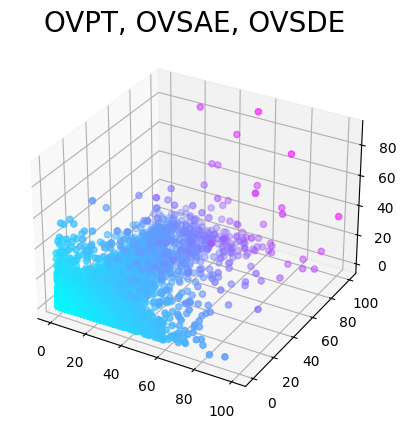

In [11]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df_INDICE_3['OVPT'], 
               new_features3['OVSAE'], 
                   new_features3['OVSDE'],
                       c=(new_features3['OVPT']+ 
                            new_features3['OVSAE']+ 
                                  new_features3['OVSDE']),
                                       cmap = plt.get_cmap('cool'))
# ax.set_xlabel('OVPT',fontsize=15,rotation=150)
# ax.set_ylabel('OVSAE',fontsize=15,rotation=60)
# ax.set_zlabel('OVPT',fontsize=15,rotation=60)
ax.set_title('OVPT, OVSAE, OVSDE', fontsize=20)
plt.show()

In [14]:
matrix_rank(df_INDICE_3)

3

Vemos que el rango es todo el subespacio que graficamos

## **2. Ajuste simple por mínimos cuadrados**

- Decide si las columnas POB_TOT y IM_2020 (población total) de df_INDICE definen una función o no. Justifica tu respuesta.

In [36]:
fig = px.scatter(x=df_INDICE["POB_TOT"], y=df_INDICE["IM_2020"], title = 'Gráfica 4: Población total por AGEB en función del Índice de Marginación: 2020')
fig.show()

In [17]:
df_INDICE["POB_TOT"].value_counts()

92       63
99       60
116      59
96       57
106      56
         ..
14216     1
10396     1
16986     1
10451     1
5235      1
Name: POB_TOT, Length: 6961, dtype: int64

In [18]:
df_INDICE["IM_2020"].value_counts()

119.325886    1
108.922210    1
110.257804    1
110.984252    1
111.377510    1
             ..
119.000673    1
124.253112    1
122.635242    1
122.038277    1
122.177483    1
Name: IM_2020, Length: 50790, dtype: int64

Vemos que tenemos diferentes valores de POB TOTAL, pero la mayoria son repetidos en la misma columna, y vemos que hay valores unicos en la columa de IM_2020.
Por lo que a varios valores de X le tocan diferentes valores de Y. Por lo que por la definición de funcion, no se aplica para estos datos. 

- Agrupa todas las AGEBS por población total y asigna la media del índice de marginación de cada grupo AGEB. Decide si la relación POB_TOT → IM_2020.mean es una función.

In [25]:
df_IM2020_POBTOT = df_INDICE[['POB_TOT', 'IM_2020']] #creamos nuevo dataframe

In [27]:
df_IM_mean = pd.DataFrame(df_IM2020_POBTOT.groupby('POB_TOT')["IM_2020"].mean().reset_index(name ='Mean'))
df_IM_mean

POB_TOT        Mean
0          22  123.899211
1          39  125.082429
2          40  104.191771
3          43  127.654501
4          47  122.254582
...       ...         ...
6956    23683  123.328987
6957    24531  119.083415
6958    25213  122.205617
6959    28908  123.942147
6960    29065  124.338342

[6961 rows x 2 columns]

In [30]:
df_IM_mean["POB_TOT"].value_counts()

22       1
4726     1
4738     1
4737     1
4736     1
        ..
2360     1
2359     1
2358     1
2357     1
29065    1
Name: POB_TOT, Length: 6961, dtype: int64

In [29]:
df_IM_mean["Mean"].value_counts()

123.899211    1
120.273197    1
119.703092    1
122.614476    1
121.075861    1
             ..
121.465965    1
119.418588    1
119.566634    1
122.919992    1
124.338342    1
Name: Mean, Length: 6961, dtype: int64

Vemos que tenemos valores unicos de X y de Y, por lo que estos datos si cumplen con la definición de funcion. 

- 2.3 Resuelve el problema de encontrar $\alpha$ y $\beta$ que mejor ajuste a la recta IM_2020.mean = $\alpha$ POB_TOT + $\beta$ utilizando el concepto de pseudo-inversa. 

In [38]:
fig = px.scatter(x=df_IM_mean["POB_TOT"], y=df_IM_mean["Mean"], trendline="ols",trendline_color_override="green")
fig.show()

## **3. Relación lineal entre el índice de marginación urbana y los indicadores**

- Encuentra las relaciones lineales de IM_2020 con las columnas de df_FEATURES. Reporta cuidadosamente tus conclusiones. Establece las relaciones encontradas en fórmulas matemáticas específicas. Hint : Proyecta a IM_2020 sobre las columnas de df_FEATURES estadarizada.

In [43]:
linear_regression = linear_model.LinearRegression()

def regresion(features, x):
    linear_regression.fit(features, x)
    print('Coeficientes:', linear_regression.coef_)
    print('\nInterceptor:', linear_regression.intercept_)


In [45]:
IM_2020 = df_INDICE["IM_2020"].values
df_FEATURES = np.array(df_FEATURES) 

regresion(df_FEATURES,IM_2020) #aplicamos regresion

Coeficientes: [-0.18093874 -0.06602918 -0.07426677 -0.2829936  -0.33139186 -0.076051
 -0.0989917  -0.0302336  -0.0543476  -0.01280568 -0.07258523]

Interceptor: 128.01433686443082


Vemos como todas las variables son negativas, esto quiere decir que cuanto mas altas son las carencias, menor es el indice, lo que nos lleva a un nivel alto de marginación.

## **4. Análisis de componentes principales**

Aplica el procedimiento de componentes principales a la matriz df_FEATURES usando la paquetería PCA de sklearn.decomposition y define un índice alternativo IM_2020_ALT definido como la primera componente. En términos lineales ¿qué tan distintos son IM_2020 y IM_2020_ALT? En la figura de abajo te muestro una gráfica de lo que me salió a mí graficando por entidad federativa, puedes explorar otras opciones para visualizar tu resultado.

<img src="grafica.png">

**Construyendo PCA**

In [46]:
scaler = StandardScaler()

def transform(x, transformer):
    features_std = transformer.fit_transform(x)
    return features_std

In [50]:
features_std= transform(df_FEATURES, scaler)

In [66]:
pca = PCA(n_components=11)
IM_2020= pd.DataFrame(transform(features_std, pca))
IM_2020

0         1         2         3         4         5         6   \
0      0.530195 -0.647026  0.008768  1.235378  0.009384 -0.361807  0.917113   
1     -2.949277  0.978026  0.084684 -0.338620  0.076424  0.354172 -0.638407   
2     -2.678283  1.009870 -0.239369  0.238993 -0.065380 -0.123716 -0.267224   
3     -2.095096  0.818525 -0.422570  0.049597 -0.106228 -0.326066  0.207826   
4     -3.050207  1.093857  0.047230 -0.065480  0.040954  0.249994 -0.690276   
...         ...       ...       ...       ...       ...       ...       ...   
50785  2.989604  0.231203 -1.500030  1.178952 -2.058429  1.577651  1.088821   
50786  0.319560 -0.545500 -0.489275  0.079799  0.220688 -0.399803  0.352955   
50787  0.171311 -0.338378 -1.048595  0.575208  0.270397 -0.855687  0.074244   
50788  0.070130 -0.077865 -0.645640 -0.638665 -0.193582 -0.612894  1.622404   
50789 -0.140398  0.690678 -1.397725 -0.341036  0.409517 -1.047177  1.481738   

             7         8         9         10  
0      0.035223 -1.111512 -0.712304 -0.692222  
1      0.169213 -0.075869 -0.236423  0.179612  
2      0.196950 -0.203216 -0.297508 -0.247385  
3      0.161034 -0.189189 -0.347945 -0.468008  
4      0.254176 -0.146000 -0.297352  0.117188  
...         ...       ...       ...       ...  
50785  0.391200 -0.729481 -0.864450 -1.016158  
50786 -0.317730  0.501711  0.023461  0.164999  
50787 -0.597010  0.661604 -0.626394  0.366824  
50788  0.176711 -0.685119 -0.024754 -0.874758  
50789 -0.400931  0.690873 -0.780888 -0.031058  

[50790 rows x 11 columns]

Lo convertimos a dataframe para mejor visualizacion

In [67]:
df_IM2020 = df_INDICE[['NOM_ENT','IM_2020']]
df_IM2020.insert(loc=2, column='IM_2020_', value= IM_2020[0] )
df_IM2020 = df_IM2020.groupby(['NOM_ENT'], as_index = False).mean()
df_IM2020

NOM_ENT     IM_2020  IM_2020_
0                    Aguascalientes  122.744526 -1.224152
1                   Baja California  121.109760 -0.748306
2               Baja California Sur  121.819653 -0.750074
3                          Campeche  119.898810  0.367014
4                           Chiapas  115.234129  2.331726
5                         Chihuahua  121.870519 -0.779999
6                  Ciudad de México  122.225778 -1.251578
7              Coahuila de Zaragoza  122.130486 -0.917751
8                            Colima  121.941324 -0.809733
9                           Durango  120.962324 -0.342749
10                       Guanajuato  120.458281 -0.232871
11                         Guerrero  115.999370  1.911189
12                          Hidalgo  120.553485 -0.231572
13                          Jalisco  120.601200 -0.521665
14              Michoacán de Ocampo  117.445382  0.882320
15                          Morelos  120.177045 -0.109915
16                           México  119.909052 -0.062127
17                          Nayarit  121.018576 -0.382343
18                       Nuevo León  122.905922 -1.323520
19                           Oaxaca  115.411788  2.420923
20                           Puebla  117.370099  1.419482
21                        Querétaro  122.008867 -1.019653
22                     Quintana Roo  120.313282 -0.181417
23                  San Luis Potosí  121.115968 -0.348239
24                          Sinaloa  121.828786 -0.687514
25                           Sonora  121.433615 -0.638968
26                          Tabasco  120.178506  0.104517
27                       Tamaulipas  121.061213 -0.433739
28                         Tlaxcala  119.041885  0.771926
29  Veracruz de Ignacio de la Llave  118.370474  0.747365
30                          Yucatán  118.293150  0.834911
31                        Zacatecas  121.175753 -0.447017

- Estudia las relaciones lineales del IM_2020 con todas las componentes. Hint: Proyecta con la pseudo-inversa a IM_2020 sobre las componentes. Saca la matriz de correlación de IM_2020_ALT con IM_2020.

Lo primero que haremos será hacer un producto entre la transpuesta de la matriz y la original y sacar la inversa del resultado

In [74]:
transp_original = np.matmul(features_std.transpose(), features_std)
transp_original =  np.linalg.inv(transp_original)

In [77]:
resultante = np.matmul(transp_original, features_std.transpose())

In [78]:
x = np.matmul(resultante, df_INDICE['IM_2020'])

## **Bibliografía**
* Aprende Machine Learning. (2020, December 19). *Ejemplo Regresión Lineal Python*. https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/
* Choosing Colormaps in Matplotlib — Matplotlib 3.6.0 documentation. (n.d.). Retrieved November 1, 2022, from https://matplotlib.org/stable/tutorials/colors/colormaps.html
* CONAPO. (n.d.). *Anexo C Metodología de estimación del índice de marginación*. Comisión Nacional De Población. Retrieved November 17, 2022, from https://www.gob.mx/cms/uploads/attachment/file/459289/07_Anexo_C.pdf
* Menon, A. (n.d.). *Linear Regression in 6 lines of Python*. Towardsdatascience. Retrieved November 11, 2022, from https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d
* Martínez, C. (2019, September 27). *RPubs - Análisis de componentes principales (PCA)*. https://rpubs.com/Cristina_Gil/PCA
* Plotly.com (n.d.). Linear and Non-Linear Trendlines in Python. Plotly. Retrieved November 11, 2022, from https://plotly.com/python/linear-fits/
* Ocampo, D. V. (n.d.). *ACP utilizando el índice de marginación*. https://rstudio-pubs-static.s3.amazonaws.com/747844_c2082be834e4454fbca1219e58855566.html